In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store.csv",index_col=0)
vstable.shape

(40, 6)

In [26]:
vstable.head(3)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,23,42,1.6,Comedy,No


In [27]:
vstable.columns

Index(['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre',
       'Incidentals'],
      dtype='object')

In [28]:
vstable.describe()

,Income,Age,Rentals,Avg Per Visit
count,50.000000,50.000000,50.000000,50.000000
mean,42300.000000,31.040000,26.320000,2.748000
std,21409.753642,11.346059,10.047723,0.898125
min,1000.000000,16.000000,9.000000,1.100000
25%,26750.000000,22.250000,19.000000,2.125000
50%,41000.000000,29.500000,25.000000,2.750000
75%,56750.000000,35.000000,32.000000,3.375000
max,89000.000000,70.000000,48.000000,4.700000


In [29]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
Gender           50 non-null object
Income           50 non-null int64
Age              50 non-null int64
Rentals          50 non-null int64
Avg Per Visit    50 non-null float64
Genre            50 non-null object
Incidentals      50 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ KB


In [30]:
vstable.dtypes

Gender            object
Income             int64
Age                int64
Rentals            int64
Avg Per Visit    float64
Genre             object
Incidentals       object
dtype: object

In [31]:
vstable["Income"]=vstable["Income"].astype(float)
vstable.dtypes

Gender            object
Income           float64
Age                int64
Rentals            int64
Avg Per Visit    float64
Genre             object
Incidentals       object
dtype: object

In [35]:
min_sal = vstable["Income"].min()
max_sal = vstable["Income"].max()

print("min ",min_sal,"max ",max_sal)

vstable.describe(include='all')

min  1000.0 max  89000.0


,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
count,50,50.000000,50.000000,50.000000,50.000000,50,50
unique,3,NaN,NaN,NaN,NaN,3,2
top,F,NaN,NaN,NaN,NaN,Drama,Yes
freq,23,NaN,NaN,NaN,NaN,20,26
mean,NaN,42300.000000,31.040000,26.320000,2.748000,NaN,NaN
std,NaN,21409.753642,11.346059,10.047723,0.898125,NaN,NaN
min,NaN,1000.000000,16.000000,9.000000,1.100000,NaN,NaN
25%,NaN,26750.000000,22.250000,19.000000,2.125000,NaN,NaN
50%,NaN,41000.000000,29.500000,25.000000,2.750000,NaN,NaN
75%,NaN,56750.000000,35.000000,32.000000,3.375000,NaN,NaN


In [34]:
vstable[["Income","Age"]].describe()

,Income,Age
count,50.000000,50.000000
mean,42300.000000,31.040000
std,21409.753642,11.346059
min,1000.000000,16.000000
25%,26750.000000,22.250000
50%,41000.000000,29.500000
75%,56750.000000,35.000000
max,89000.000000,70.000000


In [38]:
norm_sal=(vstable['Income'] - min_sal)/(max_sal - min_sal)

norm_sal

Cust ID
1     0.500000
2     0.602273
3     0.352273
4     0.659091
5     0.409091
6     0.193182
7     0.318182
8     0.829545
9     0.420455
10    0.727273
11    0.454545
12    0.284091
13    0.931818
14    0.500000
15    0.761364
16    0.181818
17    0.397727
18    0.056818
19    0.261364
20    0.125000
21    0.522727
22    0.272727
23    0.011364
24    0.886364
25    0.000000
26    0.625000
27    0.693182
28    0.636364
29    0.159091
30    0.454545
31    0.545455
32    0.522727
33    0.250000
34    0.318182
35    0.829545
36    0.318182
37    1.000000
38    0.454545
39    0.761364
40    0.181818
41    0.556818
42    0.352273
43    0.545455
44    0.386364
45    0.625000
46    0.636364
47    0.772727
48    0.579545
49    0.340909
50    0.261364
Name: Income, dtype: float64

In [41]:
age_z = (vstable['Age'] - vstable['Age'].mean())/(vstable['Age'].std())
age_z.head()

Cust ID
1   -0.532343
2    0.172747
3   -0.708616
4    3.433791
5    0.349020
Name: Age, dtype: float64

In [43]:
vstable['Age-Std']=age_z
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals,Age-Std
Cust ID,,,,,,,,
1,M,45000.0,25,32,2.5,Action,Yes,-0.532343
2,F,54000.0,33,12,3.4,Drama,No,0.172747
3,F,32000.0,23,42,1.6,Comedy,No,-0.708616
4,?,59000.0,70,16,4.2,Drama,Yes,3.433791
5,M,37000.0,35,25,3.2,Action,Yes,0.349020


In [51]:
#discretization
inc_bins = pd.qcut(vstable.Income,3)
inc_bins.head(10)

Cust ID
1     (31333.333, 51333.333]
2       (51333.333, 89000.0]
3     (31333.333, 51333.333]
4       (51333.333, 89000.0]
5     (31333.333, 51333.333]
6       (999.999, 31333.333]
7       (999.999, 31333.333]
8       (51333.333, 89000.0]
9     (31333.333, 51333.333]
10      (51333.333, 89000.0]
Name: Income, dtype: category
Categories (3, interval[float64]): [(999.999, 31333.333] < (31333.333, 51333.333] < (51333.333, 89000.0]]

In [53]:
inc_bins = pd.qcut(vstable.Income,[0,.33,.66,1], labels=['low', 'high','mid'])
inc_bins.head(10)

Cust ID
1     high
2      mid
3     high
4      mid
5     high
6      low
7      low
8      mid
9     high
10     mid
Name: Income, dtype: category
Categories (3, object): [low < high < mid]

In [55]:
vstable['inc-bins']=inc_bins

In [57]:
vstable.head(5)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals,Age-Std,inc-bins
Cust ID,,,,,,,,,
1,M,45000.0,25,32,2.5,Action,Yes,-0.532343,high
2,F,54000.0,33,12,3.4,Drama,No,0.172747,mid
3,F,32000.0,23,42,1.6,Comedy,No,-0.708616,high
4,?,59000.0,70,16,4.2,Drama,Yes,3.433791,mid
5,M,37000.0,35,25,3.2,Action,Yes,0.349020,high


In [63]:
dropped_data = vstable.drop(columns=['Age-Std','inc-bins'])
print(dropped_data.head(3))
print(vstable.head(3))

        Gender   Income  Age  Rentals  Avg Per Visit   Genre Incidentals
Cust ID                                                                 
1            M  45000.0   25       32            2.5  Action         Yes
2            F  54000.0   33       12            3.4   Drama          No
3            F  32000.0   23       42            1.6  Comedy          No
        Gender   Income  Age  Rentals  Avg Per Visit   Genre Incidentals  \
Cust ID                                                                    
1            M  45000.0   25       32            2.5  Action         Yes   
2            F  54000.0   33       12            3.4   Drama          No   
3            F  32000.0   23       42            1.6  Comedy          No   

          Age-Std inc-bins  
Cust ID                     
1       -0.532343     high  
2        0.172747      mid  
3       -0.708616     high  


In [66]:
vs_numeric = vstable[["Income","Age","Rentals","Avg Per Visit"]]
vs_numeric_std = (vs_numeric - vs_numeric.mean())/vs_numeric.std()
vs_numeric_std.head(5)

,Income,Age,Rentals,Avg Per Visit
Cust ID,,,,
1,0.126111,-0.532343,0.565302,-0.276131
2,0.546480,0.172747,-1.425199,0.725957
3,-0.481089,-0.708616,1.560553,-1.278218
4,0.780018,3.433791,-1.027098,1.616701
5,-0.247551,0.349020,-0.131373,0.503271


In [70]:
zscore = lambda x : ((x - x.mean())/x.std()) if(x.dtypes==np.float64 or x.dtypes==np.int64) else x
vs_numeric_std = vstable.apply(zscore)
vs_numeric_std.head(5)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals,Age-Std,inc-bins
Cust ID,,,,,,,,,
1,M,0.126111,-0.532343,0.565302,-0.276131,Action,Yes,-0.532343,high
2,F,0.546480,0.172747,-1.425199,0.725957,Drama,No,0.172747,mid
3,F,-0.481089,-0.708616,1.560553,-1.278218,Comedy,No,-0.708616,high
4,?,0.780018,3.433791,-1.027098,1.616701,Drama,Yes,3.433791,mid
5,M,-0.247551,0.349020,-0.131373,0.503271,Action,Yes,0.349020,high


In [72]:
vstable.groupby('Gender').mean()

,Income,Age,Rentals,Avg Per Visit,Age-Std
Gender,,,,,
?,37800.000000,32.400000,24.600000,2.620000,0.119865
F,43043.478261,32.260870,27.086957,2.713043,0.107603
M,42545.454545,29.454545,25.909091,2.813636,-0.139736


In [74]:
vstable.groupby('Genre').mean()

,Income,Age,Rentals,Avg Per Visit,Age-Std
Genre,,,,,
Action,32055.555556,23.944444,30.777778,2.627778,-0.625376
Comedy,45000.000000,31.666667,25.666667,2.641667,0.055232
Drama,49900.000000,37.050000,22.700000,2.920000,0.529699


In [78]:
vstable.groupby('Genre').describe().T


Genre                      Action        Comedy         Drama
Age           count     18.000000     12.000000     20.000000
              mean      23.944444     31.666667     37.050000
              std        5.875895     12.593890     11.104646
              min       16.000000     16.000000     22.000000
              25%       19.250000     21.000000     32.250000
              50%       25.000000     27.500000     35.000000
              75%       25.000000     45.250000     40.750000
              max       35.000000     52.000000     70.000000
Age-Std       count     18.000000     12.000000     20.000000
              mean      -0.625376      0.055232      0.529699
              std        0.517880      1.109979      0.978723
              min       -1.325570     -1.325570     -0.796752
              25%       -1.039127     -0.884889      0.106645
              50%       -0.532343     -0.312003      0.349020
              75%       -0.532343      1.252417      0.855804
              max        0.349020      1.847337      3.433791
Avg Per Visit count     18.000000     12.000000     20.000000
              mean       2.627778      2.641667      2.920000
              std        0.904112      0.967150      0.869119
              min        1.400000      1.200000      1.100000
              25%        2.125000      1.975000      2.600000
              50%        2.450000      2.600000      3.200000
              75%        2.900000      3.300000      3.500000
              max        4.700000      4.100000      4.200000
Income        count     18.000000     12.000000     20.000000
              mean   32055.555556  45000.000000  49900.000000
              std    19675.222466  29073.574381  13474.732689
              min     6000.000000   1000.000000  25000.000000
              25%    17250.000000  27750.000000  41000.000000
              50%    27500.000000  43500.000000  49500.000000
              75%    40000.000000  68000.000000  57500.000000
              max    74000.000000  89000.000000  79000.000000
Rentals       count     18.000000     12.000000     20.000000
              mean      30.777778     25.666667     22.700000
              std        7.495532     10.662878     10.553622
              min       17.000000     12.000000      9.000000
              25%       26.000000     17.250000     16.000000
              50%       31.500000     23.500000     21.000000
              75%       36.000000     34.500000     25.000000
              max       43.000000     42.000000     48.000000

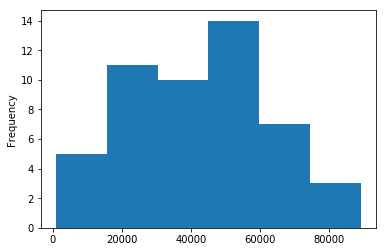

In [80]:
vstable['Income'].plot(kind='hist',bins=6)

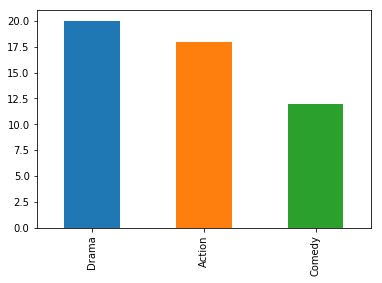

In [86]:
vstable['Genre'].value_counts().plot(kind='bar')

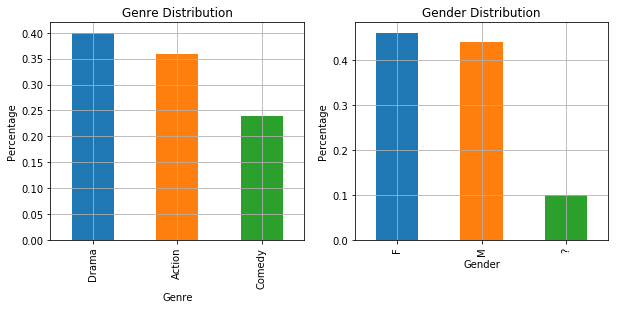

In [91]:
temp1 = vstable["Genre"].value_counts()/vstable["Genre"].count()
temp2 = vstable["Gender"].value_counts()/vstable["Gender"].count()
temp2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Percentage')
ax1.set_title("Genre Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage')
ax1.set_title("Gender Distribution")
temp2.plot(kind='bar', grid =True)

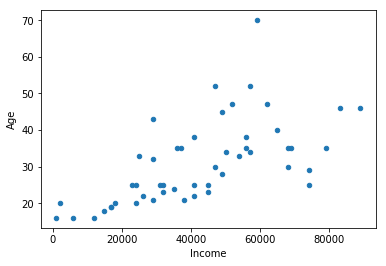

In [96]:
vstable.plot(x="Income", y="Age", kind='scatter')

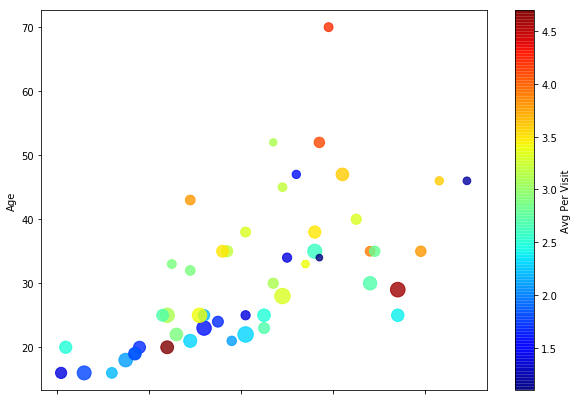

In [105]:
vstable.plot(x="Income", y="Age", kind="scatter", alpha=0.8, s=vstable["Rentals"]*5, c="Avg Per Visit", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))


In [112]:
vstable.groupby(['Genre','Gender'])['Gender'].count()

Genre   Gender
Action  ?          1
        F          5
        M         12
Comedy  ?          3
        F          6
        M          3
Drama   ?          1
        F         12
        M          7
Name: Gender, dtype: int64

In [115]:
gg = pd.crosstab(vstable['Genre'],vstable['Gender'])
gg

Gender,?,F,M
Genre,,,
Action,1,5,12
Comedy,3,6,3
Drama,1,12,7


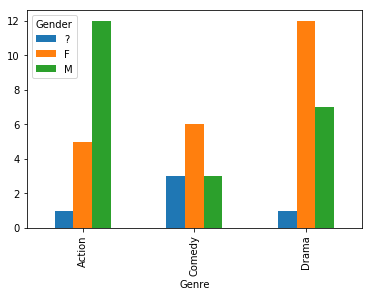

In [119]:
plt.show(gg.plot(kind='bar'))

In [121]:
gg['percent_female'] = gg['F']/(gg['F']+gg['M']+gg['?'])
gg

Gender,?,F,M,percent_female
Genre,,,,
Action,1,5,12,0.277778
Comedy,3,6,3,0.500000
Drama,1,12,7,0.600000


In [129]:
good_cust = vstable[vstable.Rentals >=30]
good_cust

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals,Age-Std,inc-bins
Cust ID,,,,,,,,,
1,M,45000.0,25,32,2.5,Action,Yes,-0.532343,high
3,F,32000.0,23,42,1.6,Comedy,No,-0.708616,high
8,M,74000.0,25,31,2.4,Action,Yes,-0.532343,mid
11,F,41000.0,22,48,2.3,Drama,Yes,-0.796752,high
12,F,26000.0,22,32,2.9,Action,Yes,-0.796752,low
15,?,68000.0,30,36,2.7,Comedy,Yes,-0.091662,mid
18,F,6000.0,16,39,1.8,Action,Yes,-1.325570,low
19,F,24000.0,25,41,3.1,Comedy,No,-0.532343,low
23,F,2000.0,20,30,2.5,Comedy,No,-0.973025,low


In [132]:
print('Good Customers')
good_cust.describe()

Good Customers


,Income,Age,Rentals,Avg Per Visit,Age-Std
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,38473.684211,25.684211,36.947368,2.826316,-0.472040
std,22214.530833,7.630732,5.854473,0.865924,0.672545
min,2000.000000,16.000000,30.000000,1.600000,-1.325570
25%,24000.000000,20.500000,32.000000,2.300000,-0.928957
50%,32000.000000,25.000000,36.000000,2.600000,-0.532343
75%,56000.000000,28.500000,41.500000,3.350000,-0.223866
max,74000.000000,47.000000,48.000000,4.700000,1.406656


In [134]:
print('All Customers')
vstable.describe()

All Customers


,Income,Age,Rentals,Avg Per Visit,Age-Std
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,42300.000000,31.040000,26.320000,2.748000,7.771561e-17
std,21409.753642,11.346059,10.047723,0.898125,1.000000e+00
min,1000.000000,16.000000,9.000000,1.100000,-1.325570e+00
25%,26750.000000,22.250000,19.000000,2.125000,-7.747183e-01
50%,41000.000000,29.500000,25.000000,2.750000,-1.357299e-01
75%,56750.000000,35.000000,32.000000,3.375000,3.490199e-01
max,89000.000000,70.000000,48.000000,4.700000,3.433791e+00


In [136]:
gender_bin=pd.get_dummies(vstable['Gender'],prefix='Gender')
gender_bin.head(3)

,Gender_?,Gender_F,Gender_M
Cust ID,,,
1,0,0,1
2,0,1,0
3,0,1,0


In [137]:
vs_ssf=pd.get_dummies(vstable)
vs_ssf.head(4)

,Income,Age,Rentals,Avg Per Visit,Age-Std,Gender_?,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,Incidentals_No,Incidentals_Yes,inc-bins_low,inc-bins_high,inc-bins_mid
Cust ID,,,,,,,,,,,,,,,,
1,45000.0,25,32,2.5,-0.532343,0,0,1,1,0,0,0,1,0,1,0
2,54000.0,33,12,3.4,0.172747,0,1,0,0,0,1,1,0,0,0,1
3,32000.0,23,42,1.6,-0.708616,0,1,0,0,1,0,1,0,0,1,0
4,59000.0,70,16,4.2,3.433791,1,0,0,0,0,1,0,1,0,0,1


In [139]:
vs_ssf.describe()

,Income,Age,Rentals,Avg Per Visit,Age-Std,Gender_?,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,Incidentals_No,Incidentals_Yes,inc-bins_low,inc-bins_high,inc-bins_mid
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,42300.000000,31.040000,26.320000,2.748000,7.771561e-17,0.100000,0.460000,0.440000,0.360000,0.240000,0.400000,0.480000,0.520000,0.340000,0.320000,0.340000
std,21409.753642,11.346059,10.047723,0.898125,1.000000e+00,0.303046,0.503457,0.501427,0.484873,0.431419,0.494872,0.504672,0.504672,0.478518,0.471212,0.478518
min,1000.000000,16.000000,9.000000,1.100000,-1.325570e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26750.000000,22.250000,19.000000,2.125000,-7.747183e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41000.000000,29.500000,25.000000,2.750000,-1.357299e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,56750.000000,35.000000,32.000000,3.375000,3.490199e-01,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89000.000000,70.000000,48.000000,4.700000,3.433791e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
vs_norm = (vs_ssf - vs_ssf.mean())/vs_ssf.std()
vs_norm.head()

,Income,Age,Rentals,Avg Per Visit,Age-Std,Gender_?,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,Incidentals_No,Incidentals_Yes,inc-bins_low,inc-bins_high,inc-bins_mid
Cust ID,,,,,,,,,,,,,,,,
1,0.126111,-0.532343,0.565302,-0.276131,-0.532343,-0.329983,-0.913682,1.116814,1.319933,-0.556304,-0.808290,-0.951113,0.951113,-0.710527,1.443087,-0.710527
2,0.546480,0.172747,-1.425199,0.725957,0.172747,-0.329983,1.072583,-0.877496,-0.742462,-0.556304,1.212436,1.030372,-1.030372,-0.710527,-0.679100,1.379258
3,-0.481089,-0.708616,1.560553,-1.278218,-0.708616,-0.329983,1.072583,-0.877496,-0.742462,1.761628,-0.808290,1.030372,-1.030372,-0.710527,1.443087,-0.710527
4,0.780018,3.433791,-1.027098,1.616701,3.433791,2.969848,-0.913682,-0.877496,-0.742462,-0.556304,1.212436,-0.951113,0.951113,-0.710527,-0.679100,1.379258
5,-0.247551,0.349020,-0.131373,0.503271,0.349020,-0.329983,-0.913682,1.116814,1.319933,-0.556304,-0.808290,-0.951113,0.951113,-0.710527,1.443087,-0.710527


In [145]:
#min max
vs_norm = (vs_ssf - vs_ssf.min())/(vs_ssf.max() - vs_ssf.min())
vs_norm.head(4)

,Income,Age,Rentals,Avg Per Visit,Age-Std,Gender_?,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,Incidentals_No,Incidentals_Yes,inc-bins_low,inc-bins_high,inc-bins_mid
Cust ID,,,,,,,,,,,,,,,,
1,0.500000,0.166667,0.589744,0.388889,0.166667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.602273,0.314815,0.076923,0.638889,0.314815,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.352273,0.129630,0.846154,0.138889,0.129630,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.659091,1.000000,0.179487,0.861111,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [148]:
corr_matrix = vs_ssf.corr()
corr_matrix

,Income,Age,Rentals,Avg Per Visit,Age-Std,Gender_?,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,Incidentals_No,Incidentals_Yes,inc-bins_low,inc-bins_high,inc-bins_mid
Income,1.000000,0.626268,-0.268460,0.305221,0.626268,-0.070773,0.032376,0.010265,-0.362514,0.071588,0.292781,0.063841,-0.063841,-0.779079,-0.023870,0.802585
Age,0.626268,1.000000,-0.514606,0.424987,1.000000,0.040361,0.100321,-0.125120,-0.473794,0.031353,0.436889,0.178347,-0.178347,-0.517525,-0.044432,0.561279
Rentals,-0.268460,-0.514606,1.000000,0.077868,-0.514606,-0.057640,0.071166,-0.036618,0.336124,-0.036911,-0.297154,-0.320683,0.320683,0.244320,-0.022069,-0.222587
Avg Per Visit,0.305221,0.424987,0.077868,1.000000,0.424987,-0.047989,-0.036288,0.065438,-0.101414,-0.067208,0.157955,-0.078885,0.078885,-0.109978,-0.162414,0.269912
Age-Std,0.626268,1.000000,-0.514606,0.424987,1.000000,0.040361,0.100321,-0.125120,-0.473794,0.031353,0.436889,0.178347,-0.178347,-0.517525,-0.044432,0.561279
Gender_?,-0.070773,0.040361,-0.057640,-0.047989,0.040361,1.000000,-0.307653,-0.295468,-0.111111,0.280976,-0.136083,-0.053376,0.053376,0.042220,-0.085749,0.042220
Gender_F,0.032376,0.100321,0.071166,-0.036288,0.100321,-0.307653,1.000000,-0.818115,-0.274212,0.045101,0.229354,0.237752,-0.237752,0.015248,-0.116994,0.099960
Gender_M,0.010265,-0.125120,-0.036618,0.065438,-0.125120,-0.295468,-0.818115,1.000000,0.342475,-0.215096,-0.148039,-0.206456,0.206456,-0.040826,0.169292,-0.125881
Genre_Action,-0.362514,-0.473794,0.336124,-0.101414,-0.473794,-0.111111,-0.274212,0.342475,1.000000,-0.421464,-0.612372,-0.386976,0.386976,0.429237,-0.157207,-0.274430
Genre_Comedy,0.071588,0.031353,-0.036911,-0.067208,0.031353,0.280976,0.045101,-0.215096,-0.421464,1.000000,-0.458831,0.397430,-0.397430,-0.007909,-0.084327,0.090948


In [150]:
#correation for a given att
corr_matrix['Rentals'].sort_values(ascending=False)

Rentals            1.000000
Genre_Action       0.336124
Incidentals_Yes    0.320683
inc-bins_low       0.244320
Avg Per Visit      0.077868
Gender_F           0.071166
inc-bins_high     -0.022069
Gender_M          -0.036618
Genre_Comedy      -0.036911
Gender_?          -0.057640
inc-bins_mid      -0.222587
Income            -0.268460
Genre_Drama       -0.297154
Incidentals_No    -0.320683
Age-Std           -0.514606
Age               -0.514606
Name: Rentals, dtype: float64

In [156]:
#correation for a given att
corr_matrix['Income'].sort_values(ascending=False)

Income             1.000000
inc-bins_mid       0.802585
Age-Std            0.626268
Age                0.626268
Avg Per Visit      0.305221
Genre_Drama        0.292781
Genre_Comedy       0.071588
Incidentals_No     0.063841
Gender_F           0.032376
Gender_M           0.010265
inc-bins_high     -0.023870
Incidentals_Yes   -0.063841
Gender_?          -0.070773
Rentals           -0.268460
Genre_Action      -0.362514
inc-bins_low      -0.779079
Name: Income, dtype: float64

# missing Data


In [162]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_3.csv",index_col=0,na_values=["?"])
vstable.shape

(50, 7)

In [163]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25.0,32,2.5,Action,Yes
2,F,54000,33.0,12,3.4,Drama,No
3,F,32000,NaN,42,1.6,Comedy,No
4,NaN,59000,70.0,16,4.2,Drama,Yes
5,M,37000,35.0,25,3.2,Action,Yes


In [165]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
Gender           45 non-null object
Income           50 non-null int64
Age              43 non-null float64
Rentals          50 non-null int64
Avg Per Visit    50 non-null float64
Genre            50 non-null object
Incidentals      50 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ KB


In [169]:
vstable['Income'] = vstable['Income'].astype(float)

In [171]:
vstable.dtypes

Gender            object
Income           float64
Age              float64
Rentals            int64
Avg Per Visit    float64
Genre             object
Incidentals       object
dtype: object

In [173]:
vstable.describe(include='all')

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
count,45,50.000000,43.000000,50.000000,50.000000,50,50
unique,2,NaN,NaN,NaN,NaN,3,2
top,F,NaN,NaN,NaN,NaN,Drama,Yes
freq,23,NaN,NaN,NaN,NaN,20,26
mean,NaN,42300.000000,30.930233,26.320000,2.748000,NaN,NaN
std,NaN,21409.753642,11.650455,10.047723,0.898125,NaN,NaN
min,NaN,1000.000000,16.000000,9.000000,1.100000,NaN,NaN
25%,NaN,26750.000000,22.000000,19.000000,2.125000,NaN,NaN
50%,NaN,41000.000000,29.000000,25.000000,2.750000,NaN,NaN
75%,NaN,56750.000000,35.000000,32.000000,3.375000,NaN,NaN


In [177]:
vstable.isnull().head(4)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False


In [182]:
vstable[vstable.isnull().any(axis=1)] ##column

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
3,F,32000.0,NaN,42,1.6,Comedy,No
4,NaN,59000.0,70.0,16,4.2,Drama,Yes
7,F,29000.0,NaN,19,3.8,Drama,No
9,NaN,38000.0,21.0,18,2.1,Comedy,No
14,M,45000.0,NaN,24,2.7,Drama,No
15,NaN,68000.0,30.0,36,2.7,Comedy,Yes
23,F,2000.0,NaN,30,2.5,Comedy,No
25,NaN,1000.0,16.0,25,1.4,Comedy,Yes
31,F,49000.0,NaN,15,3.2,Comedy,No


In [184]:
vstable[vstable.Gender.isnull()]

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
4,NaN,59000.0,70.0,16,4.2,Drama,Yes
9,NaN,38000.0,21.0,18,2.1,Comedy,No
15,NaN,68000.0,30.0,36,2.7,Comedy,Yes
25,NaN,1000.0,16.0,25,1.4,Comedy,Yes
33,NaN,23000.0,25.0,28,2.7,Action,No


In [188]:
vstable[vstable.Age.isnull()]

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
3,F,32000.0,NaN,42,1.6,Comedy,No
7,F,29000.0,NaN,19,3.8,Drama,No
14,M,45000.0,NaN,24,2.7,Drama,No
23,F,2000.0,NaN,30,2.5,Comedy,No
31,F,49000.0,NaN,15,3.2,Comedy,No
41,F,50000.0,NaN,17,1.4,Drama,No
46,F,57000.0,NaN,9,1.1,Drama,No


In [196]:
age_mean = vstable.Age.mean()
print('age mean',age_mean)
vstable.Age.fillna(age_mean,axis=0,inplace=True)
vstable.head(4)


age mean 30.930232558139537


,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000.0,25.000000,32,2.5,Action,Yes
2,F,54000.0,33.000000,12,3.4,Drama,No
3,F,32000.0,30.930233,42,1.6,Comedy,No
4,NaN,59000.0,70.000000,16,4.2,Drama,Yes


In [201]:
vstable.drop(vstable[vstable.Gender.isnull()].index,axis=0).head(5)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000.0,25.000000,32,2.5,Action,Yes
2,F,54000.0,33.000000,12,3.4,Drama,No
3,F,32000.0,30.930233,42,1.6,Comedy,No
5,M,37000.0,35.000000,25,3.2,Action,Yes
6,M,18000.0,20.000000,29,1.7,Action,No


In [203]:
vstable2 = vstable.copy()
vstable2.dropna(axis=0,inplace=True)
vstable2

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000.0,25.000000,32,2.5,Action,Yes
2,F,54000.0,33.000000,12,3.4,Drama,No
3,F,32000.0,30.930233,42,1.6,Comedy,No
5,M,37000.0,35.000000,25,3.2,Action,Yes
6,M,18000.0,20.000000,29,1.7,Action,No
7,F,29000.0,30.930233,19,3.8,Drama,No
8,M,74000.0,25.000000,31,2.4,Action,Yes
10,F,65000.0,40.000000,21,3.3,Drama,No
11,F,41000.0,22.000000,48,2.3,Drama,Yes


In [206]:
vstable2.shape

(45, 7)

In [207]:
vstable2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 50
Data columns (total 7 columns):
Gender           45 non-null object
Income           45 non-null float64
Age              45 non-null float64
Rentals          45 non-null int64
Avg Per Visit    45 non-null float64
Genre            45 non-null object
Incidentals      45 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 2.8+ KB
